In [85]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [112]:

import numpy as np
from vmc import VMCvec, VMC
from trial_wavefunctions import helium_1_param_vec, helium_1_param


psi = helium_1_param_vec

'''Initial parameters'''
alpha = np.ones(100) * 0.38
alpha_iterations = 50
N_metropolis = 10000
random_walkers = 1
gamma = 0.5

energy_plot = np.array([])
alpha_plot = np.array([])
variance_plot = np.array([])

for i in range(alpha_iterations):
    
    sim = VMCvec(alpha, psi)
    E = 0
    E2 = 0
    dE_dalpha = 0
    Eln = 0
    ln = 0
    rejection_ratio = 0
    alpha_step = 0.01

    E_met, E2_met, Eln_met, ln_met, rejections_met = sim.metropolis(N_metropolis)
    E = np.sum(E_met) / len(E_met)
    E2 = np.sum(E2_met) / len(E2_met)
    Eln = np.sum(Eln_met) / len(Eln_met)
    ln = np.sum(ln_met) / len(ln_met)
    rejection_ratio = np.sum(rejections_met) / len(rejections_met) 

    '''Define next alpha'''
    dE_dalpha = 2 * (Eln - E * ln)
    print('Alpha: ', alpha[0], '<E>: ', E, 'VarE: ', E2 - E **2, 'ratio = ', rejection_ratio)
    #alpha = alpha + alpha_step
    alpha = alpha - gamma * dE_dalpha

    '''Plot'''    
    energy_plot = np.append(energy_plot, E)
    alpha_plot = np.append(alpha_plot, alpha)
    variance_plot = np.append(variance_plot, E2-E**2)

Alpha:  0.38 <E>:  -2.8661267187654578 VarE:  0.08583457673619321 ratio =  0.6011199999999501
Alpha:  0.34248509998858256 <E>:  -2.8675591323514213 VarE:  0.08463307548222687 ratio =  0.6013689999999501
Alpha:  0.3060321346785905 <E>:  -2.8708454535018273 VarE:  0.0842238620007798 ratio =  0.6042109999999498
Alpha:  0.27088748679090136 <E>:  -2.873930621631521 VarE:  0.0865424778983428 ratio =  0.6060949999999496
Alpha:  0.23929423938755046 <E>:  -2.8727821953702124 VarE:  0.08968752662175561 ratio =  0.6062369999999495
Alpha:  0.2108073218495078 <E>:  -2.87668914302869 VarE:  0.09417188769877605 ratio =  0.6092039999999492
Alpha:  0.1880236257268929 <E>:  -2.8761841397409076 VarE:  0.0998772684316318 ratio =  0.610803999999949
Alpha:  0.17141897555251473 <E>:  -2.878127938513277 VarE:  0.10385225734711767 ratio =  0.6123889999999489
Alpha:  0.16035817189968793 <E>:  -2.8769068387490133 VarE:  0.10819543399027509 ratio =  0.611729999999949
Alpha:  0.15275844941526528 <E>:  -2.877770687

KeyboardInterrupt: 

In [111]:
# Standard loop
psi = helium_1_param

'''Initial parameters'''
alpha = 0.38
alpha_iterations = 50
N_metropolis = 10000
random_walkers = 5
gamma = 0.5

energy_plot = np.array([])
alpha_plot = np.array([])
variance_plot = np.array([])

for i in range(alpha_iterations):
    
    sim = VMC(alpha, psi)
    E = 0
    E2 = 0
    dE_dalpha = 0
    Eln = 0
    ln = 0
    rejection_ratio = 0
    alpha_step = 0.01

    for j in range(random_walkers): #We use more than one random_walkers in case one gets stuck at some X
        E_met, E2_met, Eln_met, ln_met, rejections_met = sim.metropolis(N_metropolis)
        E += E_met/random_walkers
        E2 += E2_met/random_walkers
        Eln += Eln_met/random_walkers
        ln += ln_met/random_walkers
        rejection_ratio += rejections_met/random_walkers 

    '''Define next alpha'''
    dE_dalpha = 2 * (Eln - E * ln)
    print('Alpha: ', alpha, '<E>: ', E, 'VarE: ', E2 - E **2, 'ratio = ', rejection_ratio)
    #alpha = alpha + alpha_step
    alpha = alpha - gamma * dE_dalpha

    '''Plot'''    
    energy_plot = np.append(energy_plot, E)
    alpha_plot = np.append(alpha_plot, alpha)
    variance_plot = np.append(variance_plot, E2-E**2)


Alpha:  0.38 <E>:  -2.8516674667369415 VarE:  0.08715746205829866 ratio =  0.4012599999999721
Alpha:  0.34236052605503187 <E>:  -2.874008312440419 VarE:  0.07953550924910147 ratio =  0.3974199999999726
Alpha:  0.31178042132123285 <E>:  -2.8684673348679937 VarE:  0.08349745811906928 ratio =  0.39493999999997276
Alpha:  0.27631422079193635 <E>:  -2.8795343816819923 VarE:  0.08529991793522207 ratio =  0.3925999999999731
Alpha:  0.24074669549751804 <E>:  -2.872258314261832 VarE:  0.09335360594191577 ratio =  0.393679999999973
Alpha:  0.21400344058634546 <E>:  -2.8859099203237775 VarE:  0.09211220618656668 ratio =  0.39453999999997286
Alpha:  0.19208536901736684 <E>:  -2.8851133343131936 VarE:  0.09938047485525736 ratio =  0.3906599999999733
Alpha:  0.17048980938972413 <E>:  -2.8821942304697727 VarE:  0.10078786436434584 ratio =  0.3910799999999732
Alpha:  0.160065615453998 <E>:  -2.873679653463587 VarE:  0.10268804363070849 ratio =  0.38593999999997386
Alpha:  0.153630495763856 <E>:  -2.87

KeyboardInterrupt: 

### Analytical expressions using sympy

In [19]:
from sympy import *
import math

In [12]:
x1, y1, z1 = symbols('x_1 y_1 z_1')
x2, y2, z2 = symbols('x_2 y_2 z_2')
init_printing(use_unicode=True)

In [17]:
r1 = (x1, y1, z1)
r2 = (x2, y2, z2)

In [18]:
r1_ = sqrt(x1 ** 2 + y1 **2 + z1 **2)
r2_ = sqrt(x2 ** 2 + y2 **2 + z2 **2)

In [23]:
G = exp(-2 * (r1_ + r2_))

In [24]:
G

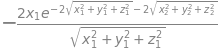

In [27]:
diff(G, x1)